# Dimensionality Reduction

Definition : Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more hard to model, more likely that's why we need dimensionality reduction.



## Principal Component Analysis

-- What are principal components: Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables; supposing the initial variables are x1,x2, ... ,x6:

Y1 = x1 + 3*x4 - x5

Y2 = 5*x2 + 7*x3 - 2*x6

 - These combinations are done in such a way that the new variables ( principal components : X1,X2) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.
  
  -> X1 and X2 are uncorrelated.

  -> All variables x1~x6 are compressed in the new pricipal components (X1,X2).

- A covariance matrix helps the correlated variables to be grouped.


-- How do we calculate it: Principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set (2 variables for example).

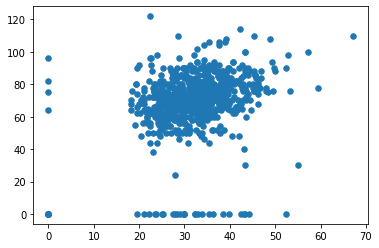

In [ ]:
## Simple plot for the PCA explanation:

plt.scatter(X[:, 5], X[:, 2], s=30,)
plt.show()

The second principal component is calculated in the same way, with the condition that it is uncorrelated with the first principal component.

And the component calculation is repeated until reaching the needed number of components.

When to use it:

Reducing the number of variables.

Making variables more interpretable.

You're not able to identify variables importance.

In [ ]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]

In [ ]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
sfit = StandardScaler().fit(X)
X_normalized = sfit.transform(X)
X_normalized

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
pca = PCA(n_components=2) ## n_components can be 2, 3 , .. less than 8, bigger than 0
pca.fit(X_normalized)
X_pca = pca.transform(X_normalized)

In [ ]:
X_pca.shape

(768, 2)

In [ ]:
X_pca

array([[ 1.06850273,  1.23489499],
       [-1.12168331, -0.73385167],
       [-0.39647671,  1.59587594],
       ...,
       [-0.28347525,  0.09706503],
       [-1.06032431,  0.83706234],
       [-0.83989172, -1.15175485]])

In [ ]:
X.shape

(768, 8)

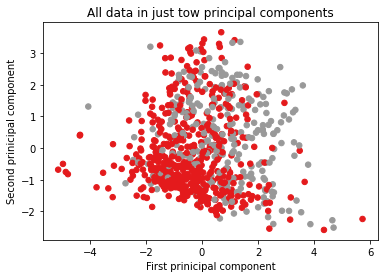

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, s=30, cmap='Set1')
plt.title('All data in just tow principal components')
plt.xlabel('First prinicipal component')
plt.ylabel('Second prinicipal component')
plt.show()

## Singular Value Decomposition ( SVD )

- It's a matrix decomposition that may reduce number of features to a smaller subset of features that are most relevant to the prediction problem.
The result is a matrix with a lower rank that is said to approximate the original matrix.

For simplicity:

[ input( dim = 10) ] -> ( SVD ) -> [ output ( dim = 3) ]

Supposing that n_components = 3 

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(X,Y)
X_svd = svd.transform(X)

In [ ]:
X_svd.shape

(768, 2)

In [ ]:
X.shape

(768, 8)

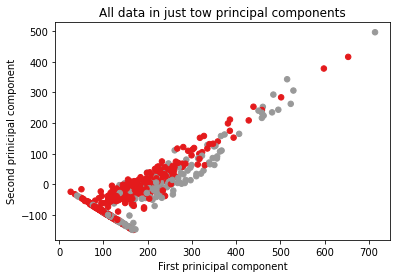

In [ ]:
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=Y, s=30, cmap='Set1')
plt.title('All data in just tow principal components')
plt.xlabel('First prinicipal component')
plt.ylabel('Second prinicipal component')
plt.show()

## Linear Discriminant Analysis ( LDA )

- Linear Discriminant Analysis seeks to best separate (or discriminate) the samples in the dataset by their class value ( y or the output ). Specifically, the model seeks to find a linear combination of input variables that achieves the maximum separation for samples between classes (class centroids or means) and the minimum separation of samples within each class.

- Can only be used in classification tasks.
- Doesn't take a n_component argument.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)
X_lda = lda.transform(X)

In [ ]:
X_lda.shape

(768, 1)

In [ ]:
X.shape

(768, 8)

In [ ]:
X_lda[:20]

array([[ 1.38024702],
       [-1.56452399],
       [ 1.76618515],
       [-1.69058752],
       [ 2.20726804],
       [-0.63094501],
       [-1.32918043],
       [ 1.12663761],
       [ 1.44250389],
       [-1.57821647],
       [-0.36032508],
       [ 2.26355831],
       [ 1.64069266],
       [ 1.18282272],
       [ 1.13107071],
       [ 0.39103911],
       [ 0.15757544],
       [-0.39709357],
       [ 0.16125157],
       [-0.26137216]])